### Neural network in keras
The dataset consists of 20 features. Use case: predict the price range in which phone lies. These ranges are divided into 4 classes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#dataset import
dataset = pd.read_csv('data/train.csv')
dataset.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [2]:
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### Normalize data and One hot encode
The purpose of normalizing is to avoid that values between columns are too different. Hence, all value are normalized per column so that columns can easily be compaired. 

Secondly, the classifications are encoded into binary values

In [3]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print('Normalized data:')
print(X[0])

#One hot encode
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
print('One hot encoded array:')
print(y[0:5])

#Train test split of model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 0)

Normalized data:
[-0.90259726 -0.9900495   0.83077942 -1.01918398 -0.76249466 -1.04396559
 -1.38064353  0.34073951  1.34924881 -1.10197128 -1.3057501  -1.40894856
 -1.14678403  0.39170341 -0.78498329  0.2831028   1.46249332 -1.78686097
 -1.00601811  0.98609664]
One hot encoded array:
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


### Build Keras model
Sequential specifies to keras that we are creating model sequentially and the output of each layer we add is input to the next layer we specify.

model.add is used to add a layer to the neural network. We need to specify as an argument what type of layer we want. The Dense is used to specify the fully connected layer. 

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [5]:
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [6]:
#To visualize neural network
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 52        
Total params: 592
Trainable params: 592
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Traing model
Provide parameters for input data, output, iterables and sample size

In [8]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
29/29 [==============================] - 0s 2ms/step - loss: 1.4308 - accuracy: 0.2828
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 1.3542 - accuracy: 0.3433
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 1.2946 - accuracy: 0.3994
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 1.2344 - accuracy: 0.4406
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 1.1694 - accuracy: 0.4822
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 1.0967 - accuracy: 0.5306
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 1.0189 - accuracy: 0.5711
Epoch 8/100
29/29 [==============================] - 0s 3ms/step - loss: 0.9407 - accuracy: 0.6117
Epoch 9/100
29/29 [==============================] - 0s 2ms/step - loss: 0.8640 - accuracy: 0.6478
Epoch 10/100
29/29 [==============================] - 0s 3ms/step - loss: 0.7944 - accuracy: 0.6889
Epoch 11/

29/29 [==============================] - 0s 1ms/step - loss: 0.0569 - accuracy: 0.9894
Epoch 84/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0587 - accuracy: 0.9900
Epoch 85/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0562 - accuracy: 0.9911
Epoch 86/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0544 - accuracy: 0.9922
Epoch 87/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 0.9917
Epoch 88/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9933
Epoch 89/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9922
Epoch 90/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0497 - accuracy: 0.9922
Epoch 91/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0487 - accuracy: 0.9939
Epoch 92/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0476 - accuracy: 0.9939
Epoch 93/100


In [10]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

In [11]:
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [12]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 20.0


### Traing model but also include test data to avoid overfitting

In [13]:
#Using test data as validation data.
history1 = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
29/29 [==============================] - 0s 7ms/step - loss: 1.4682 - accuracy: 0.2778 - val_loss: 1.3695 - val_accuracy: 0.3100
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 1.3378 - accuracy: 0.3411 - val_loss: 1.2791 - val_accuracy: 0.4100
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 1.2693 - accuracy: 0.3856 - val_loss: 1.2253 - val_accuracy: 0.4700
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 1.2047 - accuracy: 0.4328 - val_loss: 1.1599 - val_accuracy: 0.4950
Epoch 5/100
29/29 [==============================] - 0s 3ms/step - loss: 1.1370 - accuracy: 0.4589 - val_loss: 1.0907 - val_accuracy: 0.5100
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 1.0647 - accuracy: 0.5000 - val_loss: 1.0177 - val_accuracy: 0.5650
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.9932 - accuracy: 0.5417 - val_loss: 0.9506 - val_accuracy: 0.5650
Epoch 8/100
2

Epoch 59/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0943 - accuracy: 0.9767 - val_loss: 0.2115 - val_accuracy: 0.9150
Epoch 60/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0917 - accuracy: 0.9733 - val_loss: 0.2139 - val_accuracy: 0.9100
Epoch 61/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0887 - accuracy: 0.9772 - val_loss: 0.2112 - val_accuracy: 0.9150
Epoch 62/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0882 - accuracy: 0.9783 - val_loss: 0.2150 - val_accuracy: 0.9150
Epoch 63/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0857 - accuracy: 0.9767 - val_loss: 0.2111 - val_accuracy: 0.9150
Epoch 64/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0833 - accuracy: 0.9778 - val_loss: 0.2106 - val_accuracy: 0.9200
Epoch 65/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0814 - accuracy: 0.9783 - val_loss: 0.2062 - val_accuracy: 0.9150
Epoch 

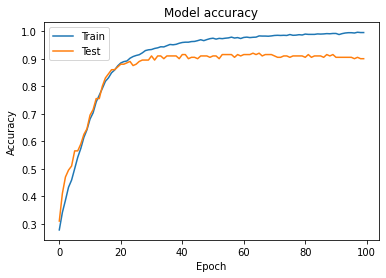

In [14]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

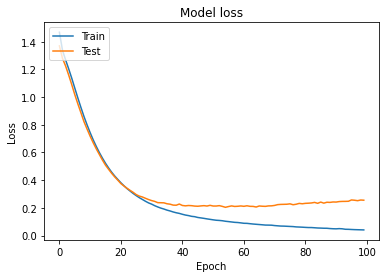

In [15]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Link to tutorial: https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5